## Goal of the project
The goal of this project is to investigate if cognitive and functional assessments (e.g., Mini-Mental State Examination (MMSE), functional assessment, memory complaints, behavioral problems, and activities of daily living (ADL) score) alone can be used to predict if a patient will be diagnosed with Alzheimer's Disease.  If so, there could be an opportunity to create a screening program that does not require clinical tests to detect Alzheimer's earlier in patients.  

This will be a classification problem using supervised learning.  The data will be split into subsets for training and testing to evaluate the predictive power of the models.  The approach will be to clean the data and perform some exploratory data analysis to get a high-level understanding of the data elements and the relationships between them.  I will then attempt to create classification models to enable a prediction of whether a patient will be diagnosed with Alzheimer's disease.  The models will include single linear regression, multiple linear regression, and a multi-layer perceptron classifier.  Lastly, I will evaluate the performance of the chosen model.

This project has been published to GitHub at https://github.com/cmis1/MSDS/tree/main/DTSA%205509.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, r2_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


## Data Understanding

This dataset represents health information for 2,149 patients, and includes data elements associated with demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, and symptoms.  The data set also contains an indicator of an Alzheimer's Disease diagnosis.  The data set is synthetic and was downloaded from Kaggle at https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset.

### Data Citation in APA Format

El Kharoua, R. (2024). Alzheimer's Disease Dataset. Version 1. [Data set]. Retrieved from https://www.kaggle.com/dsv/8668279. 

### Data Description

As mentioned above, the dataset contains 2,149 rows.  The dataset contains 35 columns, but only a subset of those columns are of interest in this investigation.  The columns of interest are related to the diagnosis as well as cognitive and functional assessments. 
 Those columns are as follows:

| Column | Data Type | Description |
| --- | --- | --- |
| MMSE | Float | Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
| FunctionalAssessment | Float | Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
| MemoryComplaints | Int | Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
| BehavioralProblems | Int | Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
| ADL | Float | Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
| Diagnosis | Int | Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes


### Load the Data
I loaded the data and reviewed the first few rows of data.  I then confirmed the size of the data matches the expected description from above, which is 2149 rows with 35 columns.

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

## Data cleaning


### Remove Columns

I removed the columns unrelated to cognitive and functional assessments because this investigation is focused solely on the relationship between cognitive and functional assessments and Alzheimer's Disease.

In [4]:
df = df.drop(columns=[
    'PatientID',
    'Age',
    'Gender',
    'Ethnicity',
    'EducationLevel',
    'BMI',
    'Smoking',
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality',
    'SleepQuality',
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease',
    'Diabetes',
    'Depression',
    'HeadInjury',
    'Hypertension',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'Confusion',
    'Disorientation',
    'PersonalityChanges',
    'DifficultyCompletingTasks',
    'Forgetfulness',
    'DoctorInCharge'])


### Check Value Range for Each Column

The following shows a summary of the data remaining in the dataset.  The models will use three numerical features (i.e., MMSE, Functional Assessment, and ADL) and two categorical features (Memory Complaints and Behavioral Problems) to predict an Alzheimer's diagnosis.  The min and max results below confirm that MMSE has values ranging between roughly 0 and 30, while Functional Assessment and ADL both have values ranging between roughly 0 and 10.  These match the expected definitions of those columns from above.

In [5]:
df.describe()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,14.755132,5.080055,0.208004,0.156817,4.982958,0.353653
std,8.613151,2.892743,0.405974,0.363713,2.949775,0.478214
min,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000
50%,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000
75%,22.161028,7.546981,0.000000,0.000000,7.581490,1.000000
max,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


The remaining columns (Memory Complaints, Behavioral Problems, and Diagnosis) are binary columns with values of 0 or 1.

In [6]:
print(f"MemoryComplaints has unique values of {df["MemoryComplaints"].unique()}")
print(f"BehavioralProblems has unique values of {df["BehavioralProblems"].unique()}")
print(f"Diagnosis has unique values of {df["Diagnosis"].unique()}")

MemoryComplaints has unique values of [0 1]
BehavioralProblems has unique values of [0 1]
Diagnosis has unique values of [0 1]


### Check for missing values

The following confirms that the data set does not contain any missing/NA values.

In [7]:
print(df.isna().sum())

MMSE                    0
FunctionalAssessment    0
MemoryComplaints        0
BehavioralProblems      0
ADL                     0
Diagnosis               0
dtype: int64


### Check for Imbalance

I want to ensure that the dataset is sufficiently balanced between patients with and without an Alzheimer's diagnosis to avoid the model giving too many false positives or false negatives (depending on whether the data had a disproportionate amount of patients with or without a diagnosis).  The data set contains about 65% of patients without a diagnosis and 35% of patients with a diagnosis.  Although this is not a 50/50 split, this distribution should be sufficiently balanced for modeling.

<Axes: xlabel='Diagnosis', ylabel='Percent'>

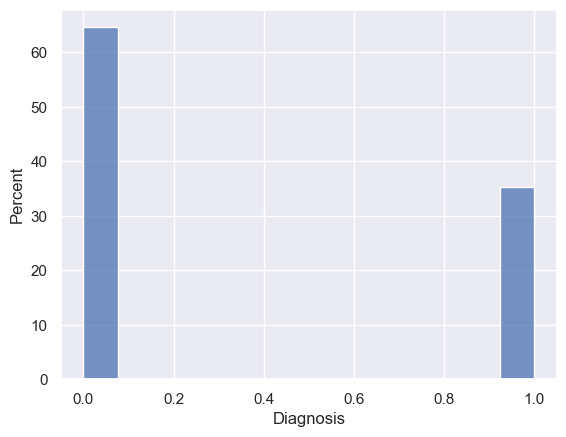

In [8]:
sns.histplot(data=df, x="Diagnosis", stat="percent")

## EDA

### Distribution of Data

MMSE, functional assessment, and ADL have fairly even distributions.  However, memory complaints and behavioral problems are heavily skewed.

<Axes: xlabel='Diagnosis', ylabel='Percent'>

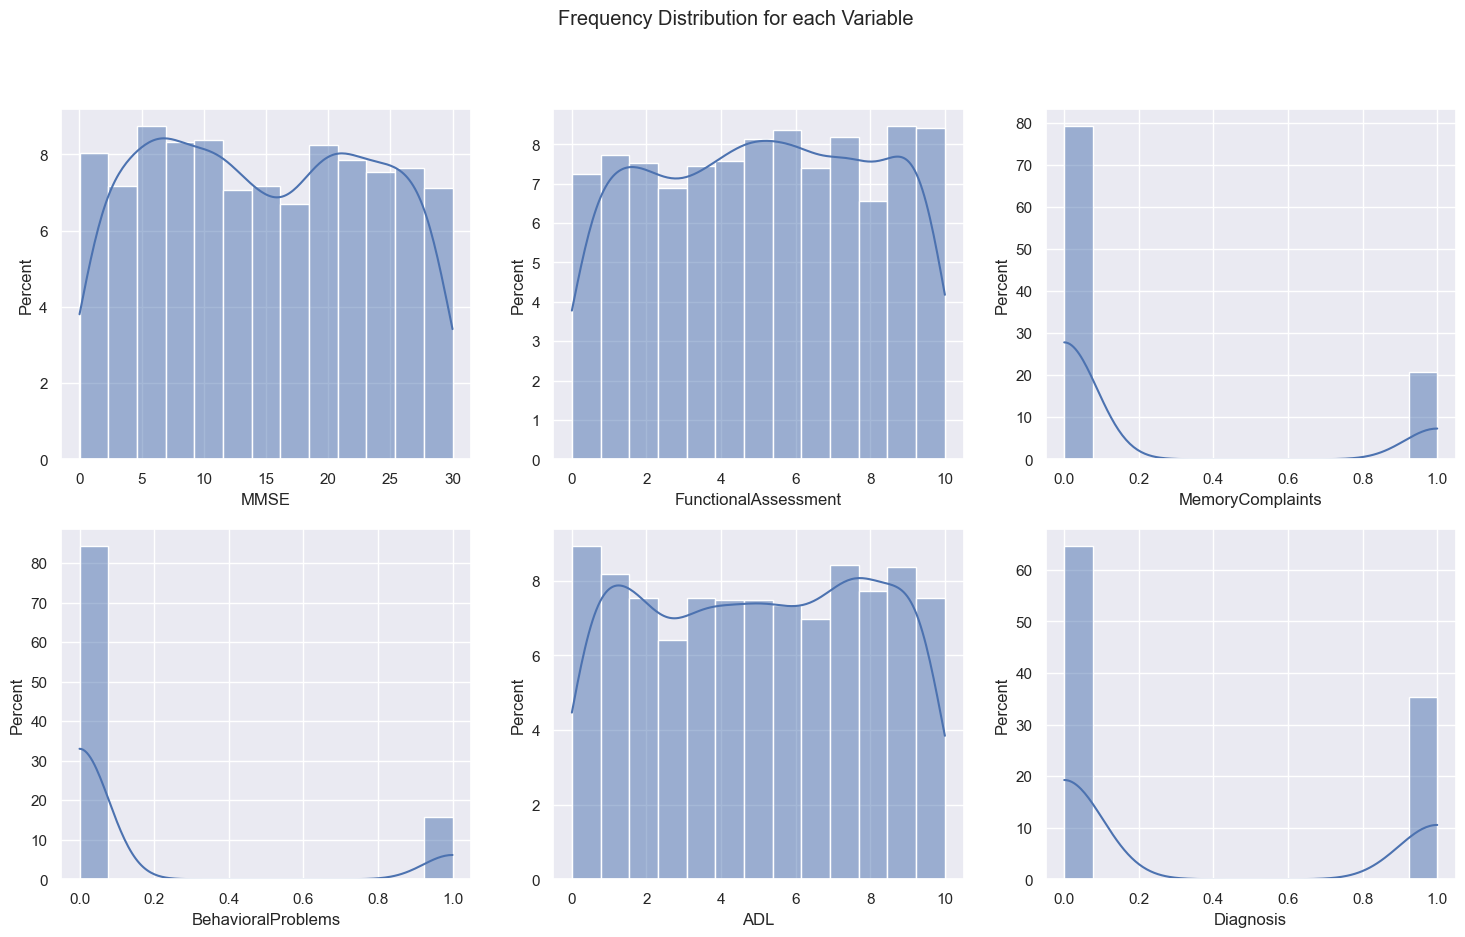

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Frequency Distribution for each Variable')

sns.histplot(ax=axes[0, 0], data=df, x='MMSE', kde=True, stat="percent")
sns.histplot(ax=axes[0, 1], data=df, x='FunctionalAssessment', kde=True, stat="percent")
sns.histplot(ax=axes[0, 2], data=df, x='MemoryComplaints', kde=True, stat="percent")
sns.histplot(ax=axes[1, 0], data=df, x='BehavioralProblems', kde=True, stat="percent")
sns.histplot(ax=axes[1, 1], data=df, x='ADL', kde=True, stat="percent")
sns.histplot(ax=axes[1, 2], data=df, x='Diagnosis', kde=True, stat="percent")

### Correlation Analysis

There does not appear to be any correlation between the predictive features.  However, there is some weak correlation between each of the predictive features and whether the patient receives an Alzheimer's diagnosis.  This could be a promising sign that a well-performing model can be created.  Note that higher scores for MMSE, functional assessment, and ADL indicate greater cognitive impairment, which aligns with the negative correlation shown between those features and the diagnosis variable.

In [9]:
df.corr()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
MMSE,1.000000,0.024932,0.007652,0.025408,0.003359,-0.237126
FunctionalAssessment,0.024932,1.000000,0.002320,-0.021941,0.053904,-0.364898
MemoryComplaints,0.007652,0.002320,1.000000,-0.009765,-0.037511,0.306742
BehavioralProblems,0.025408,-0.021941,-0.009765,1.000000,0.043376,0.224350
ADL,0.003359,0.053904,-0.037511,0.043376,1.000000,-0.332346
Diagnosis,-0.237126,-0.364898,0.306742,0.224350,-0.332346,1.000000


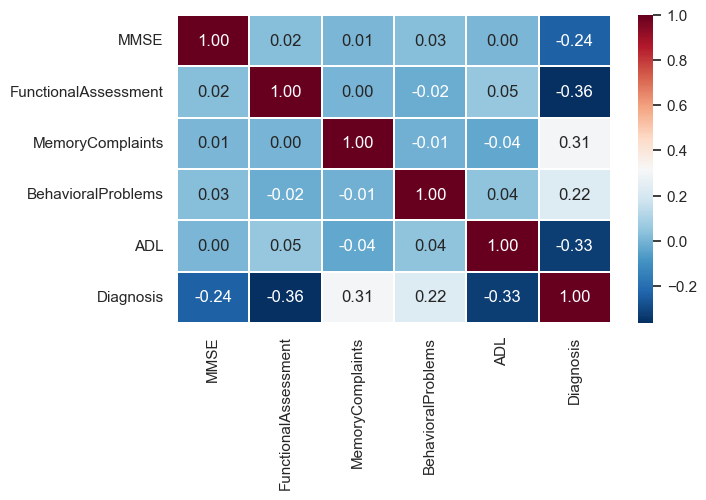

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))  
#Plot a heatmap using our correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.1, cmap="RdBu_r", ax=ax)
plt.show()

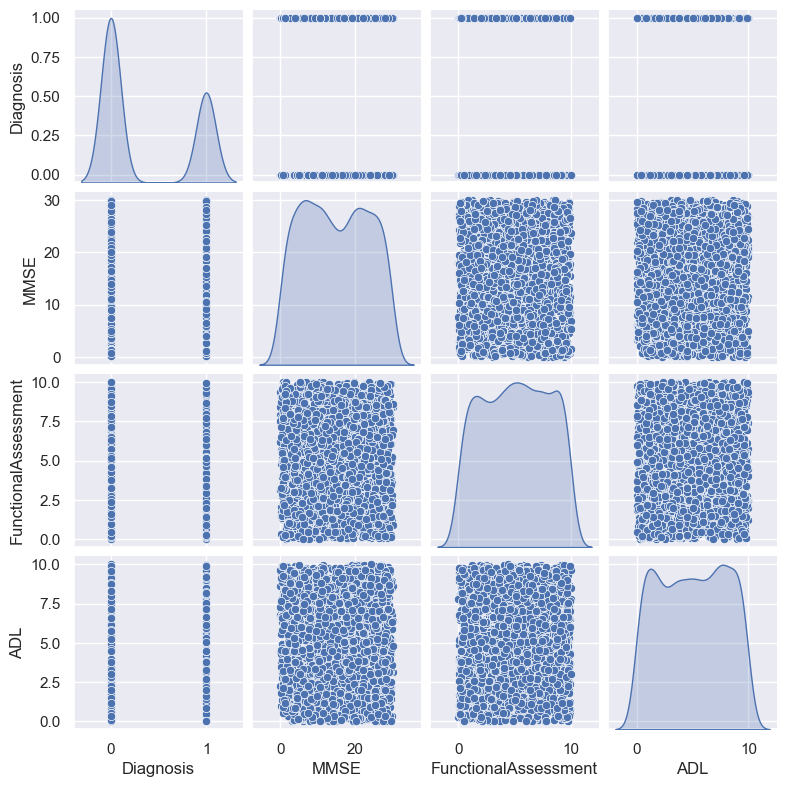

In [11]:
#Pair plot the non-categorical features and the target variable
df_plot = df.loc[:, ["Diagnosis", "MMSE", "FunctionalAssessment", "ADL"]]
sns.pairplot(df_plot, height=2, diag_kind="kde")
plt.show()

### Categorical Features

The following graphs show that an Alzheimer's diagnosis is more probable if the patient has memory complaints or behavior problems.  This does not mean that memory complaints or behavior problems will be strong predictors,but this confirms a positive correlation between each of those predictors and a diagnosis.

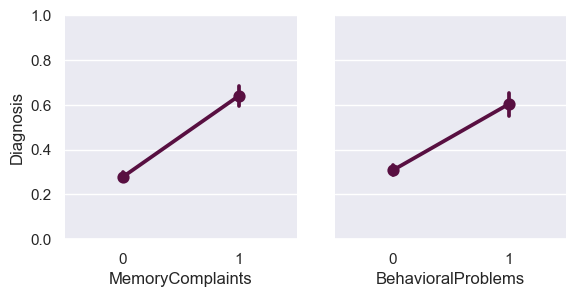

In [12]:
#Pair grid each categorical (0/1) column with the target variable
g = sns.PairGrid(df, y_vars="Diagnosis",
                 x_vars=["MemoryComplaints", "BehavioralProblems"],
                 height=3, aspect=1)

g.map(sns.pointplot, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

### Feature Importance

Using a RandomForestClassifier, the contribution each feature has on the model's prediction for a diagnosis is shown below.  The non-categorical variables (i.e., MMSE, functional assessment, and ADL) have stronger predictive power than the categorical features (i.e., memory complaints and behavioral problems). 

In [13]:
#Separate the predictors from the target variable
X = df.loc[:, ["MMSE", "FunctionalAssessment", "ADL", "MemoryComplaints", "BehavioralProblems"]]
y = df["Diagnosis"]


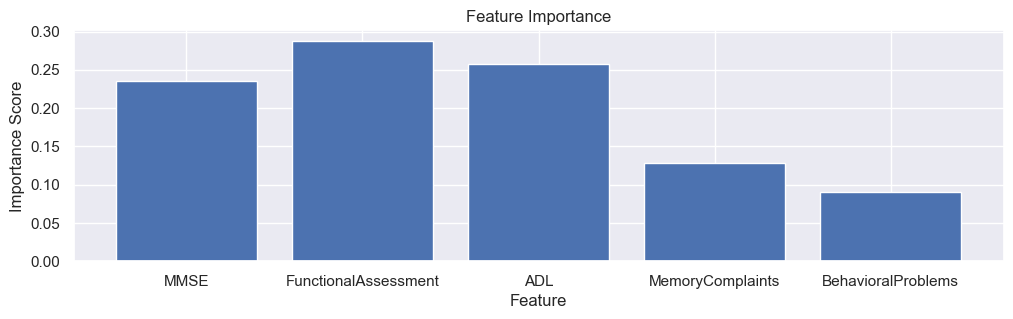

In [14]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

# Plot feature importances
plt.figure(figsize=(12, 3))
plt.title("Feature Importance")
plt.bar(X.columns, rfc.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

## Modeling

The first step is to split the dataset into training and test subsets with 20% of the data used for validation.

In [27]:
x_train, x_test = train_test_split(df, test_size=.2, random_state=42)
x_train.describe()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,14.737994,5.069688,0.205934,0.156486,4.970744,0.353112
std,8.639328,2.890435,0.404500,0.363422,2.947606,0.478076
min,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000
25%,7.010207,2.562307,0.000000,0.000000,2.324166,0.000000
50%,14.410221,5.098709,0.000000,0.000000,5.026306,0.000000
75%,22.228168,7.496824,0.000000,0.000000,7.583825,1.000000
max,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000


### Simple Linear Regression

Applying each feature to a simple linear regression model, functional assessment emerges as the best single predictor.  The order of strength of predictors below matches the results above from the RandomForestClassifier.  The highest adjusted R squared value of the simple linear regression models is rather low (less than 0.15), so the model needs improvement. 

In [28]:
#Grab the columns names other than the target variable
col_names = df.columns[:5].tolist()
results = pd.DataFrame({'predictor': [], 'adj_r2': []})

#Loop through each feature and capture the adjusted R sqaured value for each simple linear model
for feature in col_names:
    form = 'Diagnosis~'+feature
    model = smf.ols(formula=form, data=x_train).fit()
    results.loc[len(results)] = [feature, model.rsquared_adj]

results = results.sort_values(by='adj_r2', ascending=False)
print(results)


              predictor    adj_r2
1  FunctionalAssessment  0.142319
4                   ADL  0.114956
2      MemoryComplaints  0.088262
0                  MMSE  0.049904
3    BehavioralProblems  0.042605


### Feature Engineering

Given that functional assessment had the most influence based on the feature importance results above, I attempted to engineer a feature to see if increasing the exponential power of functional assessment provides a better model. The best model found had an adjusted R-squared value of 0.17. This is a slight improvement over the simple linear regression model, but the model's predictive power is still low.

In [29]:
max_r2 = 0
max_n = 0
for i in range(1,16):
    form = 'Diagnosis~FunctionalAssessment'
    for j in range (1, i):
        form = form + f'+np.power(FunctionalAssessment,{j})'
    model = smf.ols(formula=form, data=df).fit()
    print(f'{i} {model.rsquared}')
    if(model.rsquared > max_r2):
        max_r2 = model.rsquared
        max_n = i
    
print(f"FunctionalAssessment to the {max_n} power provides the best adjusted R-squared of {max_r2}")


1 0.13315077414269993
2 0.13315077414269993
3 0.13326255346876925
4 0.15394365234025542
5 0.15396719468885312
6 0.16051599151628582
7 0.16052203826425648
8 0.16438410172840923
9 0.16457369146016365
10 0.1676455111174
11 0.16775159001217088
12 0.16951386111984312
13 0.16984273014605944
14 0.17074550936529886
15 0.17068068907128642
FunctionalAssessment to the 14 power provides the best adjusted R-squared of 0.17074550936529886


### Multi-Linear Regression Model

Using a forward-selection process, I combined all of the features into a multi-linear regression model by adding the feature with the most influence on the target variable one at a time.  For brevity, I am only showing the final model below and not the intermediate steps.  All of the coefficients are statistically significant (low p-value), but the adjusted R-squared of the model is still on the low side at 0.428.  This is a good improvement over the feature-engineered regression model, but the model could be further improved. 

In [30]:
mlr = smf.ols(formula='Diagnosis~FunctionalAssessment+ADL+MemoryComplaints+BehavioralProblems+MMSE', data=x_train).fit()
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     258.2
Date:                Wed, 07 May 2025   Prob (F-statistic):          6.07e-206
Time:                        21:42:23   Log-Likelihood:                -687.26
No. Observations:                1719   AIC:                             1387.
Df Residuals:                    1713   BIC:                             1419.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9696 

### Interaction Terms

I leveraged a backward selection process to see if adding interaction terms increased the predictive power of the model.  I started with all interaction terms included and then iteratively removed the statistically insignificant terms.  The following interaction terms were insignificant and consquently removed from the model. 

- FunctionalAssessment:MemoryComplaints
- ADL:MemoryComplaints
- FunctionalAssessment:BehavioralProblems
- ADL:BehavioralProblems
- MemoryComplaints:BehavioralProblems

Again for brevity, I am only showing the final model and not the intermediate steps.  The remaining model is shown below and has an adjusted R-squared value of 0.489.  Once again, this is an improvement over the last model, but there is still room for improvement.

In [31]:
interaction_model = smf.ols(formula='Diagnosis~FunctionalAssessment+ADL+MemoryComplaints+BehavioralProblems+MMSE+FunctionalAssessment*ADL+FunctionalAssessment*MMSE+ADL*MMSE+MemoryComplaints*MMSE+BehavioralProblems*MMSE', data=x_train).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Diagnosis   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 07 May 2025   Prob (F-statistic):          1.62e-242
Time:                        21:42:32   Log-Likelihood:                -588.59
No. Observations:                1719   AIC:                             1199.
Df Residuals:                    1708   BIC:                             1259.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### Multi-layer Perceptron classifier.

Lastly, I used a multi-layer perceptron classifier.  This type of neural network uses a layered approach in which each layer feeds into the following layer.  This approach iteratively adjusts weights between layers to enable the model to learn complex patterns within the dataset.  The MLP classifier achieved an R-squared value of 0.574.  This is the model with the highest R-squared value thus far and will be used for the remainder of this project, which includes the hypertuning parameter and model evaluation.

In [40]:
#Separate the training set into features and the target variable
X = x_train.loc[:, ["MMSE", "FunctionalAssessment", "ADL", "MemoryComplaints", "BehavioralProblems"]]
y = x_train["Diagnosis"]

#Instantiate and fit the MLP 
clf = MLPClassifier(solver='adam', random_state=1)
clf.fit(X, y)

#Separate the test set into features and the target variable
x_t = x_test.loc[:, ["MMSE", "FunctionalAssessment", "ADL", "MemoryComplaints", "BehavioralProblems"]]
y_t = x_test["Diagnosis"]
y_pred = clf.predict(x_t)
print(r2_score(y_t, y_pred))

0.5738656473419692


## Results and Analysis

### Improving Performance Through Hypertuning Parameters

Using a grid search, the best cross-validation score occurs with the following hypertuning parameters:

| Parameter | Value | Explanation |
| --- | --- | --- |
| activation | relu | the function f(x) for the hidden layer will be f(x) = max(0,x)
| maximum iterations | 750 | the model will run for a maximum of 750 epochs
| solver | adam | the weight optimization will use a stochastic gradient-based optimizer


In [47]:
#Define the hypertuning parameters and values to test
params = {
    'solver': ["lbfgs","adam"],
    'activation': ["identity", "logistic", "tanh", "relu"],
    'max_iter': [200, 350, 500, 750]
}

#Instantiate the grid search with an MLP classifier, the hypertuning parameters, and K-folks cross-validation with K=3
grid = GridSearchCV(MLPClassifier(random_state=1), param_grid=params, cv=3)
grid.fit(X, y)

print(f"Best params: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

Best params: {'activation': 'relu', 'max_iter': 750, 'solver': 'adam'}
Best cross-validation score: 0.910413030831879


### Accuracy and Precision Scores

Using the hypertuning parameter values above, the model produces an accuracy score of 0.923 and a precision score of 0.917.

This means that 92.3% of the model's predictions were correct, while 91.7% of the patients predicted by the model to have Alzheimer's had an Alzheimer's diagnosis in reality. In other words, 8.3% of patients erroreously received an Alzheimer's diagnosis by the model. 
 These patients could undergo undue stress or expensive medical appointments due to the inaccurate diagnosis.   

In [60]:
#Instantiate an MLP Classifier using the parameter values found above
clf = MLPClassifier(solver="adam", activation="relu", max_iter=750, random_state=1)
clf.fit(X, y)
y_pred = clf.predict(x_t)
print(f"Accuracy: {accuracy_score(y_t, y_pred)}")
print(f"Precision: {precision_score(y_t, y_pred)}")

Accuracy: 0.9232558139534883
Precision: 0.9166666666666666


### Check for Simplification

The feature importance graph above indicated that behavioral problems had the least influence on the model's prediction.  When trying to remove this feature to see if a simpler model can produce similar results, the simpler model's accuracy and precision dropped to 0.847 and 0.813, respectively.  To maintain the higher level of accuracy and precision, I will stay with the model that uses all five predictive features.

In [62]:
#Separate the training set into features and the target variable
X2 = x_train.loc[:, ["MMSE", "FunctionalAssessment", "ADL", "MemoryComplaints"]]

#Fit the existing MLP Classifier with the smaller number of features
clf.fit(X2, y)

#Separate the test set into features and the target variable
x_t2 = x_test.loc[:, ["MMSE", "FunctionalAssessment", "ADL", "MemoryComplaints"]]
y_pred2 = clf.predict(x_t2)
print(f"Accuracy: {accuracy_score(y_t, y_pred2)}")
print(f"Precision: {precision_score(y_t, y_pred2)}")

Accuracy: 0.8465116279069768
Precision: 0.8129496402877698


### Confusion Matrix

Of the 430 patients in the test set, the model predicted 397 of them correctly and 33 incorrectly.  The model missed diagnosing 21 patients who had Alzheimer's in reality and incorrectly diagnosed 12 patients who did not have Alzheimer's in reality.

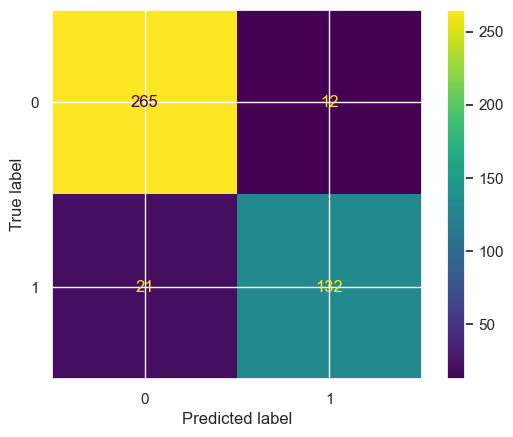

In [61]:
# Generate the confusion matrix
cm = confusion_matrix(y_t, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

### ROC Curve and Area Under the Curve

Re-fitting the MLP Classifier with all predictive features and plotting the ROC Curve shows an area under the curve (AUC) of 0.952. An AUC close to 1.0 indicates a well-performing model. 

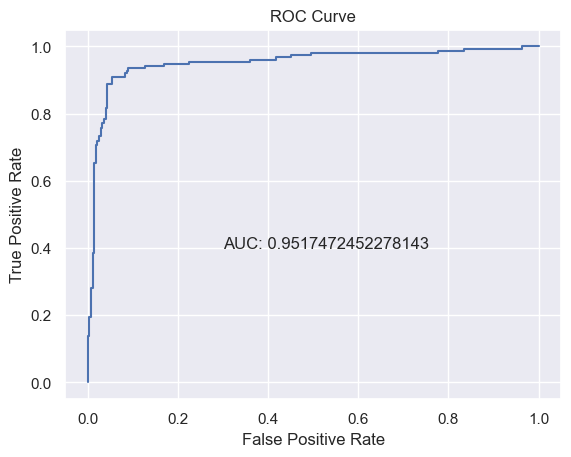

In [83]:
#Fit the existing MLP Classifier with all predictive features
clf.fit(X, y)
ypp = clf.predict_proba(x_t)
auc = roc_auc_score(y_t, ypp[:,1])

#Plot the ROC Curve and display the AUC score
fpr, tpr, th = roc_curve(y_t, ypp[:,1])
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.text(0.3, 0.4, f"AUC: {auc}")
plt.show()

## Discussion and Conclusion

### Learnings and Takeaways

I appreciated the usability of the dataset in that the data was well organized with clearly named columns and a sufficient number of rows.  The documentation provided with the dataset grouped the columns into several subsets, which enabled me to select the columns that aligned with my vision for the project.  This really showed me the value of data engineering to clean and prepare datasets in ways that enable modeling.  It has been some time since I took a class in the data mining specialization of this degree program, but this project made the value of that specialization abundantly clear.

This project also demonstrated the value of trying different models and iterating to improve model performance.  For example, I tried different modeling techniques, hyperparameters, and subsets of the predictive features to provide a model with high predictive power.

### Things that Did Not Go as Planned

The first models I attempted were simple linear regression and multiple linear regression models.  They did not adequately explain the variability in the data (i.e., the adjusted R-squared values were low).  This was likely due to the lack of correlation between the predictive features and the diagnosis target variable.  

I was also disappointed in the low predictive power of the categorical variables (i.e., memory complaints and behavioral problems).  I question those features would have been better predictors for a diagnosis if the data set used a numerical range for those features (similar to the other features).

### Ways to Improve

The project could be improved by using features that were more correlated with the target variable.  However, I wanted to see if a  model could be created such that a lightweight Alzheimer's screening test could be created that (1) would not require clinical measurements/scans/tests and (2) could identify the disease earlier in patients.

I would prefer to have real patient data instead of a synthetic data set.  However, I chose this data set because it was licensed for use and contained variables that could be used to create the type of Alzheimer's screening test I envisioned.

I do not have a medical background, so my analysis and modeling decisions were based purely on the statistical results shown above and not based on any domain expertise.  In reality, a data scientist would want to include someone with domain/subject expertise to arrive at an appropriate solution.